# Complete analysis and comparison

In [49]:
import time

import numpy as np
import prince
import pandas as pd
import sklearn.cluster as skcl
import sklearn.metrics as skmet
import sklearn.preprocessing as skpre
import scipy
import matplotlib.pyplot as plt

### Defining functions

In [2]:
def generateFAMD(data, nbrDim):
    famd = prince.FAMD(
        n_components=nbrDim,
        n_iter=10,
        copy=True,
        check_input=True,
        engine='auto'
    )
    famd = famd.fit(data)
    return famd.row_coordinates(data)

In [3]:
def generateMCA(data, nbrDim):
    mcaData = prince.MCA(n_components=nbrDim, benzecri=False).fit(data)
    return mcaData.row_coordinates(data)

In [4]:
def clusterKmean(data, nbrCluster):
    kmeans = skcl.KMeans(init="random", n_init=10, n_clusters=nbrCluster).fit(data)
    return skmet.silhouette_score(data, kmeans.labels_, metric="euclidean")

In [94]:
def countClusters(labels):
    cluster = []
    for i in labels:
        if i not in cluster:
            cluster.append(i)
    return len(cluster)

In [95]:
def clusterHiera(data, nbrCluster):
    nodes = []
    generatedCluster = 0
    while generatedCluster != nbrCluster:
        Z = scipy.cluster.hierarchy.linkage(data, method="centroid", metric="euclidean")
        nodes = scipy.cluster.hierarchy.fcluster(Z, nbrCluster, criterion="maxclust")
        generatedCluster = countClusters(nodes)
        if generatedCluster != nbrCluster:
            print("Error, got " + str(generatedCluster) + " clusters instead of " + str(nbrCluster))
    return skmet.silhouette_score(data, labels=nodes, metric="euclidean")

In [92]:
def generateSilhouettePlot(data, dimRedMethod, clusteringMethod, dimRange, maxCluster, iter, title, legendLabel):
    print("Generating plot for " + legendLabel + str(dimRange[0]) + " to " + str(dimRange[1]) + " with varying clusters from 2 to " + str(maxCluster))
    t = time.time()
    calculatedData = []
    for i in range(dimRange[0], dimRange[1]+1):
        print("Doing dim " + str(i))
        meanScore = np.array([0. for i in range(2, maxCluster+1)])
        for k in range(iter):
            pointsData = dimRedMethod(data, i)
            #print("[iter="+str(k)+"; dim="+str(i)+"] Generated point cloud")
            for j in range(2, maxCluster+1):
                clusterScore = clusteringMethod(pointsData, j)
                #print("[iter="+str(k)+"; dim="+str(i)+"] Calculated cluster score for " + str(j) + " clusters :")
                #print(clusterScore)
                meanScore[j-2] = clusterScore + meanScore[j-2]
        meanScore = meanScore/iter
        calculatedData.append(meanScore)
        plt.plot([i for i in range(2, maxCluster+1)], meanScore, label = legendLabel + str(i))

    print("Finished : " +str(time.time() - t))
    plt.title(title)
    plt.ylabel("Silhouette score")
    plt.xlabel("Number of clusters")
    plt.legend()
    return calculatedData

### Generating plots for each method combination

Generating plot for dim=2 to 9 with varying clusters from 2 to 10
Doing dim 2
Doing dim 3
Doing dim 4
Doing dim 5
Doing dim 6
Doing dim 7
Doing dim 8
Doing dim 9
Finished : 1209.6694309711456


[]

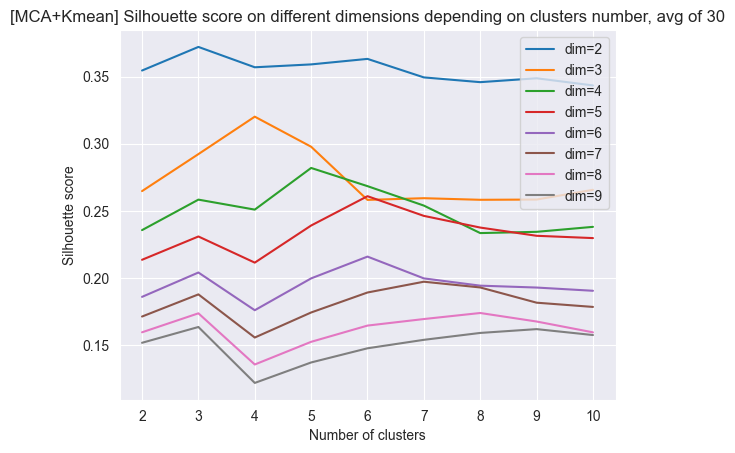

In [73]:
mcakmeandata = generateSilhouettePlot(
    data=pd.read_csv("dataset/preprocessed-shootings.csv"),
    dimRedMethod=generateMCA,
    clusteringMethod=clusterKmean,
    dimRange=[2,9],
    maxCluster=10,
    iter=30,
    title="[MCA+Kmean] Silhouette score on different dimensions depending on clusters number, avg of 30",
    legendLabel="dim="
)
plt.plot()

In [ ]:
mcahieradata = generateSilhouettePlot(
    data=pd.read_csv("dataset/preprocessed-shootings.csv"),
    dimRedMethod=generateMCA,
    clusteringMethod=clusterHiera,
    dimRange=[2, 9],
    maxCluster=10,
    iter=30,
    title="[MCA+Hiera] Silhouette score on different dimensions depending on clusters number, avg of 30",
    legendLabel="dim="
)
plt.show()

In [75]:
# Transform fetch original age column which is numeric
d_url = 'dataset/shootings.csv'
shooting_df_age = pd.read_csv(d_url)['age']
scale = skpre.StandardScaler().fit(shooting_df_age.array.reshape(-1, 1))
shooting_df_age = scale.transform(shooting_df_age.array.reshape(-1, 1))
print(shooting_df_age.sum() / shooting_df_age.size)
d_url = 'dataset/preprocessed-shootings.csv'
shooting_df_cleaned = pd.read_csv(d_url)
shooting_df_cleaned.age = shooting_df_age
shooting_df_cleaned.head()

1.9741330350025256e-16


,manner_of_death,age,gender,race,region,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,shot,1.296004,M,Asian,Pacific,Yes,attack,Not fleeing,No,Guns
1,shot,0.823305,M,White,Pacific,No,attack,Not fleeing,No,Guns
2,shot and Tasered,-1.067493,M,Hispanic,West North Central,No,other,Not fleeing,No,Unarmed
3,shot,-0.358444,M,White,Pacific,Yes,attack,Not fleeing,No,Other unusual objects
4,shot,0.193039,M,Hispanic,Mountain,No,attack,Not fleeing,No,Other weapon objects


Generating plot for dim=2 to 9 with varying clusters from 2 to 10
Doing dim 2
Doing dim 3
Doing dim 4
Doing dim 5
Doing dim 6
Doing dim 7
Doing dim 8
Doing dim 9
Finished : 1308.8539502620697


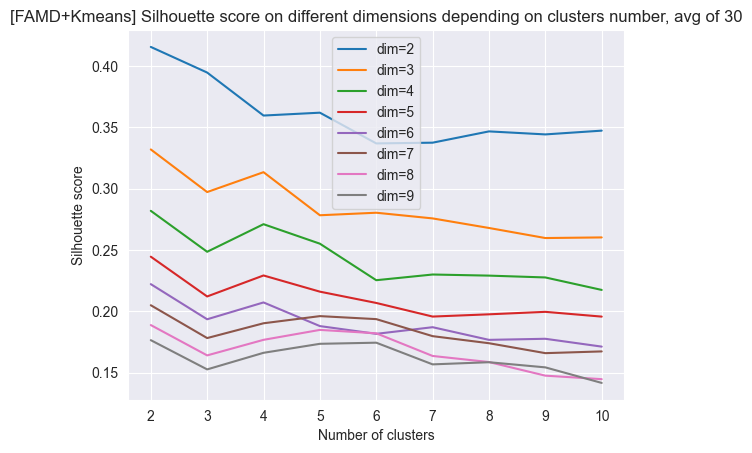

In [76]:
famdkmeansdata = generateSilhouettePlot(
    data = shooting_df_cleaned,
    dimRedMethod = generateFAMD,
    clusteringMethod = clusterKmean,
    dimRange = [2, 9],
    maxCluster = 10,
    iter = 30,
    title = "[FAMD+Kmeans] Silhouette score on different dimensions depending on clusters number, avg of 30",
    legendLabel = "dim="
)

In [80]:
famdkmeansdata

[array([0.41563439, 0.39472639, 0.35966894, 0.36200165, 0.33693887,
        0.33753844, 0.34674235, 0.34428355, 0.34735234]),
 array([0.33202207, 0.2972706 , 0.31347861, 0.2783498 , 0.28040944,
        0.27577723, 0.26797293, 0.25976569, 0.26027265]),
 array([0.28196174, 0.24856338, 0.27106106, 0.25516029, 0.22537435,
        0.23001869, 0.22911766, 0.22762662, 0.21744576]),
 array([0.24456121, 0.21212   , 0.22924077, 0.21603749, 0.20682895,
        0.19572354, 0.19756143, 0.19958012, 0.19568574]),
 array([0.22217825, 0.19351186, 0.20724502, 0.1879586 , 0.18163025,
        0.18705065, 0.17672345, 0.17760684, 0.17121382]),
 array([0.20496686, 0.17818978, 0.19025256, 0.19609003, 0.19363638,
        0.17975305, 0.17398384, 0.16588702, 0.16730118]),
 array([0.18879895, 0.16405785, 0.17674286, 0.18484938, 0.18208616,
        0.16359363, 0.15862469, 0.14753168, 0.14467547]),
 array([0.1764843 , 0.15263149, 0.16616636, 0.17350315, 0.17442016,
        0.15673878, 0.15848904, 0.154289  , 0.1416

In [96]:
famdhieradata = generateSilhouettePlot(
    data = shooting_df_cleaned,
    dimRedMethod = generateFAMD,
    clusteringMethod = clusterHiera,
    dimRange = [2, 9],
    maxCluster = 10,
    iter = 10,
    title = "[FAMD+Hiera] Silhouette score on different dimensions depending on clusters number, avg of 30",
    legendLabel = "dim="
)

Generating plot for dim=2 to 9 with varying clusters from 2 to 10
Doing dim 2
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8 clusters instead of 9
Error, got 8

KeyboardInterrupt: 

In [90]:
famdhieradata26 = famdhieradata

NameError: name 'famdhieradata' is not defined

In [86]:
data = famdkmeansdata
maxL = [{"s": 0, "dim": 2} for i in range(2,11)]
for i in range(len(data[0])):
    for j in range(3, 10):
        if data[j-2][i] > maxL[i]["s"]:
            maxL[i] = {"s": data[j-2][i], "dim": j}

maxL

[{'s': 0.3320220734406478, 'dim': 3},
 {'s': 0.2972705958075393, 'dim': 3},
 {'s': 0.31347861145907013, 'dim': 3},
 {'s': 0.2783497972772116, 'dim': 3},
 {'s': 0.28040943888970016, 'dim': 3},
 {'s': 0.2757772348164094, 'dim': 3},
 {'s': 0.2679729274733011, 'dim': 3},
 {'s': 0.2597656881155725, 'dim': 3},
 {'s': 0.2602726512864522, 'dim': 3}]

In [87]:
data = mcakmeandata
maxL = [{"s": 0, "dim": 2} for i in range(2,11)]
for i in range(len(data[0])):
    for j in range(3, 10):
        if data[j-2][i] > maxL[i]["s"]:
            maxL[i] = {"s": data[j-2][i], "dim": j}

maxL

[{'s': 0.2646639596668307, 'dim': 3},
 {'s': 0.2922277387339967, 'dim': 3},
 {'s': 0.320112295647522, 'dim': 3},
 {'s': 0.29771623104920875, 'dim': 3},
 {'s': 0.2683563934471112, 'dim': 4},
 {'s': 0.25937969521787996, 'dim': 3},
 {'s': 0.25819241769658174, 'dim': 3},
 {'s': 0.25837099972474814, 'dim': 3},
 {'s': 0.2656299884542666, 'dim': 3}]